<a href="https://colab.research.google.com/github/youngjin0305/AI-Assignment1/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [9]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [10]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [11]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [12]:
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", input_shape=(32, 32, 3)
    ),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile and Train neural network

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-5, verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", patience=5, restore_best_weights=True, verbose=1
    ),
]

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/30
704/704 - 21s - 29ms/step - accuracy: 0.3803 - loss: 1.7543 - val_accuracy: 0.3722 - val_loss: 1.7289 - learning_rate: 1.0000e-03
Epoch 2/30
704/704 - 5s - 7ms/step - accuracy: 0.5079 - loss: 1.3846 - val_accuracy: 0.5598 - val_loss: 1.2554 - learning_rate: 1.0000e-03
Epoch 3/30
704/704 - 10s - 14ms/step - accuracy: 0.5575 - loss: 1.2555 - val_accuracy: 0.5502 - val_loss: 1.3068 - learning_rate: 1.0000e-03
Epoch 4/30
704/704 - 5s - 7ms/step - accuracy: 0.5897 - loss: 1.1700 - val_accuracy: 0.5846 - val_loss: 1.2127 - learning_rate: 1.0000e-03
Epoch 5/30
704/704 - 5s - 7ms/step - accuracy: 0.6168 - loss: 1.1016 - val_accuracy: 0.6212 - val_loss: 1.1218 - learning_rate: 1.0000e-03
Epoch 6/30
704/704 - 5s - 7ms/step - accuracy: 0.6373 - loss: 1.0569 - val_accuracy: 0.6444 - val_loss: 1.0367 - learning_rate: 1.0000e-03
Epoch 7/30
704/704 - 10s - 14ms/step - accuracy: 0.6503 - loss: 1.0187 - val_accuracy: 0.6852 - val_loss: 0.9215 - learning_rate: 1.0000e-03
Epoch 8/30
704/704 - 

## Evaluate neural network performance


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.7937 - loss: 0.6101


[0.6100571751594543, 0.7936999797821045]

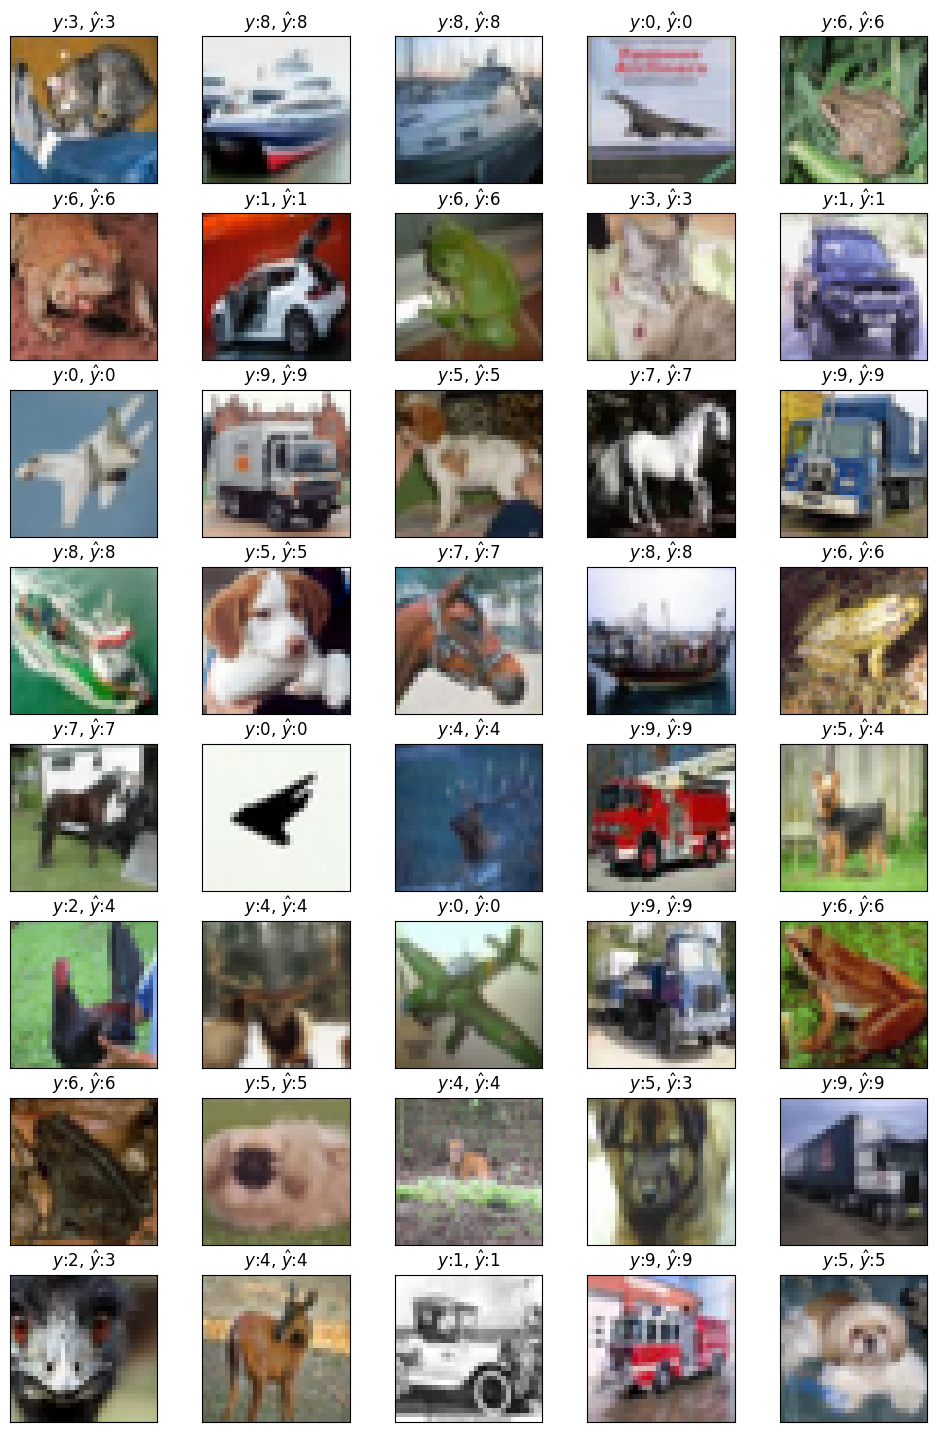

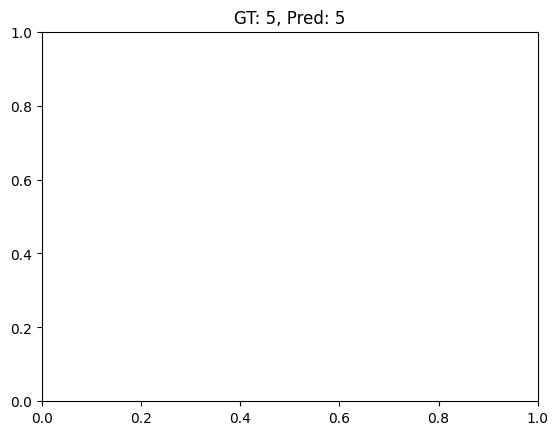

In [15]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7936999797821045
